In [1]:
# Load Packages
import numpy as np
import sklearn.model_selection
import matplotlib.pyplot as plt

In [2]:
# Make helper functions
def plot_digit(X, y, idx):
    img = X[idx].reshape(28,28)
    plt.imshow(img, cmap='Greys', interpolation='nearest')
    plt.title('true label: %d' % y[idx])
    plt.show()

In [4]:
# Load data
from mlxtend.data import mnist_data
X, y = mnist_data()

# We just focus on 1's and 0's:
keep=(y==0) | (y==1)
X=X[keep,:]
y=y[keep]

y = np.expand_dims(y,1)

C:\Users\thoma\AppData\Local\Temp\ipykernel_35776\413155112.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title('true label: %d' % y[idx])


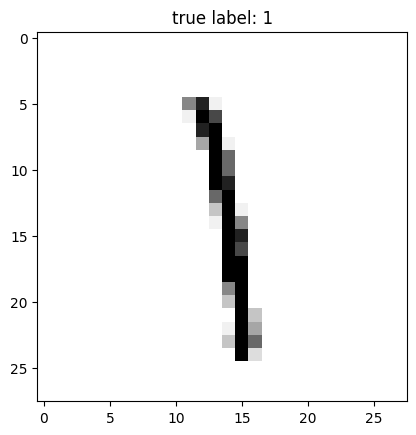

In [5]:
# Inspect data
plot_digit(X, y, 700)

In [14]:
# Create a loss function:
def avrLoss(y, yhat):
    eps = 1e-3
    yhat = np.maximum(yhat, eps)    #Remove 0's
    yhat = np.minimum(yhat, 1-eps)    #Remove 1's
    loss = -(y*np.log(yhat)+(1-y)*np.log(1-yhat))

    return np.mean(loss)

In [16]:
# Test loss function:
loss = avrLoss(np.array([0,1,0,1]), np.linspace(.1,.9,4))
assert np.all(loss==0.5543313122608056)

In [17]:
# Create a Sigmoid
def sigmoid(z):
    z = np.maximum(z,-700)
    return 1/(1+np.exp(-z))

In [18]:
# Check Sigmoid
out=sigmoid(np.array(range(-5,5)))
assert np.all(np.around(out,8)==np.array([0.00669285, 0.01798621, 0.04742587, 0.11920292, 0.26894142, 0.5, 0.73105858, 0.88079708, 0.95257413, 0.98201379]))


In [19]:
# Make test & train data
Xtrain,Xtest,ytrain,ytest=sklearn.model_selection.train_test_split(X,y,test_size=0.3,shuffle=True)

In [20]:
# Train

#INITIATE WEIGHTS AND BIASES (w,b)
w = np.zeros((Xtrain.shape[1],1))
b = 0

nEpoch = 50

accuracy = np.zeros(nEpoch)
trainRate = 0.005

for iTrain in range(nEpoch):
    #evaluate
    #CALCULATE a
    a = sigmoid(np.matmul(Xtrain,w)+b)

    #update weights
    wgrad = np.matmul(Xtrain.T,(a - ytrain))/ytrain.size
    bgrad = np.sum(a.T - ytrain)/ytrain.size

    assert(wgrad.shape == w.shape)


    #calculate loss & accuracy
    loss = avrLoss(ytrain, a)
    yhat=a>.5
    accuracy[iTrain]=np.mean(yhat==ytrain)

    #UPDATE W AND b
    w -= wgrad*trainRate
    b -= bgrad*trainRate

    if np.mod(iTrain,10)==0:
        print(iTrain,loss,accuracy[iTrain])

Y_prediction_test = sigmoid(np.matmul(Xtest,w)+b)>0.5
Y_prediction_train = sigmoid(np.matmul(Xtrain,w)+b)>0.5

print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - ytrain)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - ytest)) * 100))

0 0.6931471805599454 0.4928571428571429
10 0.030600877956363053 0.9957142857142857
20 0.030600877956363053 0.9957142857142857
30 0.010914854933917978 0.9985714285714286
40 0.028974774232337533 0.9957142857142857
train accuracy: 99.71428571428571 %
test accuracy: 100.0 %


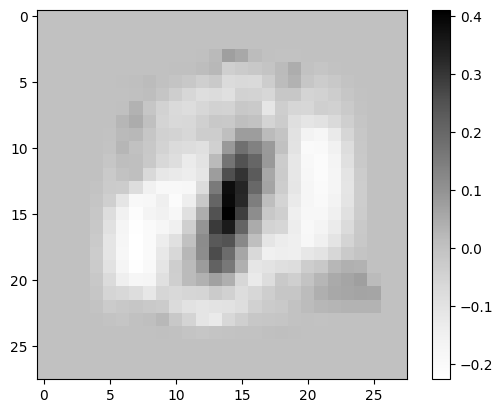

In [21]:
#see what the network does:

img = w.reshape(28,28)
h=plt.imshow(img, cmap='Greys',  interpolation='nearest')
plt.colorbar(h)
plt.show()

Train accuracy:  1.0
Test accuracy:  0.9966666666666667


c:\repositories\DeepLearning\.venv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


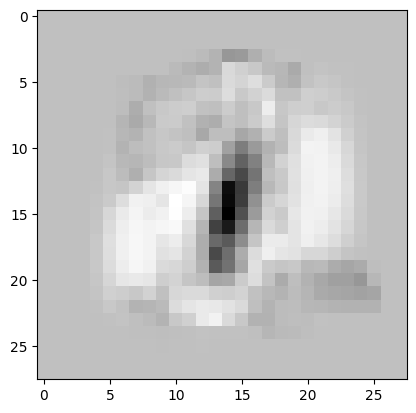

In [22]:
#commpare with scikit-learn:

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(Xtrain, ytrain)

clf.predict(X)
print('Train accuracy: ',clf.score(Xtrain, ytrain))
print('Test accuracy: ',clf.score(Xtest, ytest))

img = (clf.coef_).reshape(28,28)
plt.imshow(img, cmap='Greys',  interpolation='nearest')
plt.show()